# Lista 2 (7 pkt.)

In [13]:
import string
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## Zadanie 1. (1 pkt)

To zadanie należy wykonać ręcznie, bez używania komputera, korzystając z instrukcji z **one_time_pad.pdf**. Zaszyfruj wiadomość o treści: "NEW 15 HELICOPTERS.", za pomocą klucza: 68496 47757 10126 36660 25066. Do słów, które są w tabeli poniżej użyj odpowiednio ich kodów. Uwaga: w wiadomości jest liczba mnoga "helicopterS".

$\begin{array}{|c|c|c|c|c|c|c|c|c|c|}
\hline
CODE&A&E&I&N&O&T&&\\
0&1&2&3&4&5&6&&&\\
\hline
B&C&D&F&G&H&J&K&L&M\\
70&71&72&73&74&75&76&77&78&79\\
\hline
P&Q&R&S&U&V&W&X&Y&Z\\
80&81&82&83&84&85&86&87&88&89\\
\hline
FIG&.&:&,/'&(/)&+&-&=&REG/?&SPC\\
90&91&92&93&94&95&96&97&98&99\\
\hline
\end{array}$

$\begin{array}{|cc|cc|cc|cc|}
\hline
000&ABORT&253&DECODE&505&MILITARY&758&STREET\\
\hline
019&ACCEPT&262&DELAY&514&MONEY&767&SUBWAY\\
\hline
028&ACCESS&271&DIFFICULT&523&MONTH&776&SUCCESS\\
\hline
037&ADDRESS&280&DOCUMENT&532&MORNING&785&SUPPLY\\
\hline
046&AFFIRMATIVE&299&ENCODE&541&MORSE&794&SUPPORT\\
\hline
055&AGENT&307&EVENING&550&NEGATIVE&802&TELEPHONE\\
\hline
064&AIRPLANE&316&EXECUTE&569&NIGHT&811&TODAY\\
\hline
073&AIRPORT&325&FACTORY&578&OBSERVATION&820&TOMORROW\\
\hline
082&ANSWER&334&FAILED&587&PASSPORT&839&TRAIN\\
\hline
091&AUTHORITY&343&FERRY&596&PERSON&848&TRANSFER\\
\hline
109&BETWEEN&352&FLIGHT&604&PHOTOGRAPH&857&TRANSMIT\\
\hline
118&BORDER&361&FREQUENCY&613&POSITIVE&866&TRAVEL\\
\hline
127&BUILDING&370&HARBOUR&622&POSSIBLE&875&TRUCK\\
\hline
136&CANCEL&389&HELICOPTER&631&POWER&884&UNABLE TO\\
\hline
145&CHANGE&398&HIGHWAY&640&PRIORITY&893&URGENT\\
\hline
154&CIVILIAN&406&IDENTITY&659&PROBLEM&901&VERIFY\\
\hline
163&COMPROMISE&415&IMMEDIATE&668&QUESTION&910&WEEK\\
\hline
172&COMPUTER&424&IMPOSSIBLE&677&RADIO&929&WITHIN\\
\hline
181&CONFIRM&433&INFORMATION&686&RECEIVE&938&YESTERDAY\\
\hline
190&CONTACT&442&INSTRUCTIONS&695&RENDEZVOUS&&\\
\hline
208&COORDINATE&451&LOCATE&703&REPEAT&&\\
\hline
217&COUNTRY&460&LOCATION&712&RESERVATION&&\\
\hline
226&COVERT&479&MAIL&721&ROUTINE&\\
\hline
235&CURRENT&488&MEETING&730&SATELLITE&\\
\hline
244&DANGER&497&MESSAGE&749&SHIP&\\
\hline
\end{array}$

## Zadanie 2 (1 pkt)

To zadanie również jest do zrobienia ręcznie. Używając klucza 11454 03055 15565 17466 26950 54906 odkoduj wiadomość 11454 00572 94578 25863 84286 24376. Wykorzystaj instrukcje z one_time_pad.pdf oraz tablicę kodów z Zadania 1.

## Zadanie 3. (1 pkt)

Wczytaj obrazki 'miki.png' oraz 'quest.png'.

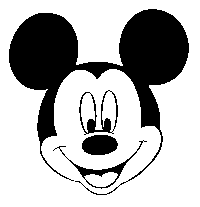

In [25]:
img1 = Image.open('miki.png').convert('L')
img1

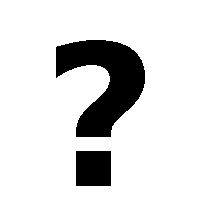

In [26]:
img2 = Image.open('quest.png').convert('L')
img2

Napisz funkcję **add_pic(img1, img2)**, która przyjmuje dwa obrazki i je dodaje piksel po pikselu za pomocą XOR, czyli **biały+biały=czarny, biały+czarny=biały, czarny+czarny=czarny**. Warto wykorzystać to, że **np.array(img)** zwraca tablicę, z wartościami 255 dla białych pikseli i 0 dla czarnych, aby zamienić tablicę z powrotem na obraz należy użyc **Image.fromarray()** przy czym tablica musi być typu **np.uint8** czyli tworząc tablicę podajemy typ: **np.array([1,2,3,4], dtype=np.uint8)**. Funkcja ma zwracać obrazek.

In [64]:
def add_pic(img1, img2):
    arr1 = np.array(img1)
    arr2 = np.array(img2)
    result = np.full(arr1.shape,0)
    diff_mask = np.abs(arr1 - arr2) > 0
    result[diff_mask] = 255
    return Image.fromarray(np.array(result,dtype=np.uint8))

Wygeneruj (pseudo)losowy klucz, czyli obrazek z losowymi białymi i czarnymi pikselami, użyj **np.random**. Następnie zaszyfruj tym kluczem, za pomocą **add_pic**, oba obrazki **img1** i **img2**. Zauważ, że oba obrazki wyglądają na dobrze zaszyfrowane, zobacz jednak co się wydarzy kiedy dodasz do siebie te zaszyfrowane obrazki.

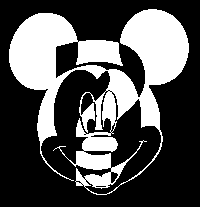

In [65]:
add_pic(img1,img2)

In [324]:
key = np.random.choice([0, 255], size=np.array(img1).shape).astype(np.uint8)
key_img = Image.fromarray(key)
key_img

NameError: name 'img1' is not defined

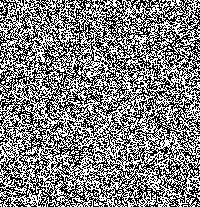

In [67]:
enc_img1 = add_pic(img1,key_img)
enc_img1

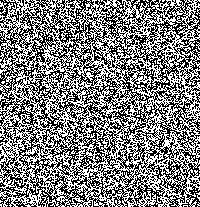

In [68]:
enc_img2 = add_pic(img2,key_img)
enc_img2

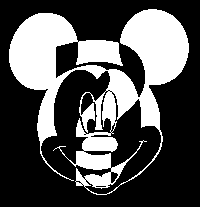

In [69]:
enc_sum = add_pic(enc_img1,enc_img2)
enc_sum

## Zadanie 4 (2 pkt.)

Zmienne ***msg1_enc*** oraz ***msg2_enc*** zawierają dwie zaszyfrowane wiadomości, w języku angielskim.

In [1]:
msg1_enc = '\x1e\x17\x0c\x12\x1b\x08\x0cf\x0e\x11x\x1a\x1c\x12o\x06\x18\x1f\x17\x03\x10\x01fkh\x1f\x08'
msg2_enc = '\x0b\ni\x07\x1c\x02k\x1f\x16e\x01\x0b\x07\x03\n\x15\x15\x0c\x1el\x07\x03\x03\x16\x01\x01\x02'

Wiadomo, że zostały zaszyfrowane tym samym kluczem, możemy to wykorzystać do odszyfrowania ich. W tym zadaniu konwencja zamiany liter na liczby i ich dodawania jest inna, niż w poprzednich. Znaki zamieniamy na liczby kodujące te znaki w **Unicode**, czyli za pomocą **ord()**, następnie dodajemy je do siebie za pomocą XOR na poziomie bitów, czyli za pomocą **^**. Napisz funkcję **add_str(msg1, msg2)**, które przyjmuje dwa teksty i zwraca tekst będący sumą tych tekstów zgodnie z powyższą konwencją.

In [2]:
def add_str(msg1, msg2):
    n = min(len(msg1), len(msg2))
    result_chars = []
    for i in range(n):
        c1 = ord(msg1[i])
        c2 = ord(msg2[i])
        xor_val = c1 ^ c2
        result_chars.append(chr(xor_val))
    return ''.join(result_chars)

In [165]:
enc_sum = add_str(msg1_enc,msg2_enc)
enc_sum

'\x15\x1de\x15\x07\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'

In [261]:
eng_top_5 = [" THE ", " BE "," TO ", " OF ", " AND ", " YESTERDAY ", " 3 PM ", " AIRPORT ", " EVE ", "MEETING AT "]

In [270]:
def add_str_offset(msg1, msg2, offset):
    padded_msg2 = '\x00' * offset + msg2
    padded_msg2 += '\x00' * (len(msg1) - len(padded_msg2))
    
    return add_str(msg1, padded_msg2)

In [310]:
enc_sum = add_str(msg1_enc,msg2_enc)
enc_sum

allowed_chars = string.ascii_uppercase + string.digits + string.whitespace

for i in range(len(msg1_enc)):
    for word in eng_top_5:
        result = add_str_offset(enc_sum, word , i)
        filtered = ''.join(c for c in result if c in allowed_chars)
        print(f"WORD:{word}\tOFFSET:{i}\t{repr(result)}")


# MEETING OFFSET:0
# enc_sum = add_str_offset(enc_sum, "MEETING ",0)
# MEETING AT ?
# enc_sum = add_str_offset(enc_sum, "MEETING AT",0)
# msg1: MEETING AT ...
# msg2: XX AND YY ...

# TIME ? -> AM, PM, EVENING, MORNING, TOMMOROW, YESTERDAY ?

# for i in range(len(msg1_enc)):
#     for word in [" AM", " PM", " EVENING", " MORNING" , " TOMMOROW", " YESTERDAY"]:
#         result = add_str_offset(enc_sum, word, i)
#         filtered = ''.join(c for c in result if c in allowed_chars)
#         print(f"WORD:{word}\tOFFSET:{i}\t{repr(result)}")


#WORD: YESTERDAY	OFFSET:9	'XX AND YY\x00 THE AIRPo\x17\x02e}i\x1e\n'
#WORD: EVENING	OFFSET:19	'XX AND YY y\x11\x1b\x11e\x13\r\x13\tORT 3 PM'
# THE AIRP -> THE AIRPORT?, 3 PM

# enc_sum = add_str_offset(enc_sum, " THE AIRPORT",10)
# enc_sum = add_str_offset(enc_sum, " 3 PM",25)


# for i in range(len(msg1_enc)):
#     for word in eng_top_5:
#         result = add_str_offset(enc_sum, word, i)
#         filtered = ''.join(c for c in result if c in allowed_chars)
#         print(f"WORD:{word}\tOFFSET:{i}\t{repr(result)}")

WORD: THE 	OFFSET:0	"5I-P'\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n"
WORD: BE 	OFFSET:0	'5_ 5\x07\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: TO 	OFFSET:0	'5I*5\x07\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: OF 	OFFSET:0	'5R#5\x07\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: AND 	OFFSET:0	"5\\+Q'\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n"
WORD: YESTERDAY 	OFFSET:0	'5D FSO5=Y-Y\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: 3 PM 	OFFSET:0	'5.EEJ*gy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: AIRPORT 	OFFSET:0	'5\\,GWE5-8ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: EVE 	OFFSET:0	"5X3P'\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n"
WORD:MEETING AT 	OFFSET:0	'XX AND YY Y\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: THE 	OFFSET:1	'\x15=1]B*gy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: BE 	OFFSET:1	"\x15='P'\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n"
WORD: TO 	OF

In [316]:
# WORD: AND 	OFFSET:2	'\x15\x1dETINGy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
enc_sum = add_str_offset(enc_sum," AND ",2)
# MEETING ?
for i in range(len(msg1_enc)):
    for word in eng_top_5:
        result = add_str_offset(enc_sum, word , i)
        filtered = ''.join(c for c in result if c in allowed_chars)
        print(f"WORD:{word}\tOFFSET:{i}\t{repr(result)}")


WORD: THE 	OFFSET:0	"5I-P'\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n"
WORD: BE 	OFFSET:0	'5_ 5\x07\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: TO 	OFFSET:0	'5I*5\x07\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: OF 	OFFSET:0	'5R#5\x07\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: AND 	OFFSET:0	"5\\+Q'\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n"
WORD: YESTERDAY 	OFFSET:0	'5D FSO5=Y-Y\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: 3 PM 	OFFSET:0	'5.EEJ*gy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: AIRPORT 	OFFSET:0	'5\\,GWE5-8ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: EVE 	OFFSET:0	"5X3P'\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n"
WORD:MEETING AT 	OFFSET:0	'XX AND YY Y\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: THE 	OFFSET:1	'\x15=1]B*gy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'
WORD: BE 	OFFSET:1	"\x15='P'\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n"
WORD: TO 	OF

In [313]:
# msg1: MEETING AT THE AIRPORT 3 PM
# msg2: XX AND YY YESTERDAY EVENING
print(add_str("MEETING AT THE AIRPORT 3 PM",add_str(msg1_enc,msg2_enc))=="XX AND YY YESTERDAY EVENING")
print(add_str("XX AND YY YESTERDAY EVENING",add_str(msg1_enc,msg2_enc))=="MEETING AT THE AIRPORT 3 PM")

True
True


Zauważmy, że jeżeli dwie wiadomości są zaszyfrowane tym samym kluczem to dodanie ich do siebie sprawia, że dostaniemy sumę wiadomości bez klucza. Poza tym zauważmy, że jeżeli znamy jakieś słowo występujące w którejś z wiadomości i je dodamy do sumy tych wiadomości w odpowiednim miejscu to w wyniku dostaniemy poprawne słowo z drugiej wiadomości. Zatem metoda łamania tych wiadomości jest następująca, zgadujemy jakie słowo może być w którejś z wiadomości, dodajemy je w różnych miejscach sumy wiadomości i patrzymy czy powstaje coś co może być fragmentem poprawnego tekstu, następnie na podstawie tego fragmentu zgadujemy większą pozostałą część słowa i teraz to słowo używamy do odczytania kolejnego fragmentu z pierwszej wiadomości.

Pierwsze słowo wybieramy z pośród najpopularniejszych słów w danym języku.

Najpopularniejsze angielskie słowa:
1. THE
2. BE
3. TO
4. OF
5. AND

Uwaga 1: Słowa zapisane są drukowanymi literami.

Uwaga 2: Słowa oddzialane są spacjami, zatem biorąc np. słowo THE należy sprawdzać ciąg znaków "&nbsp; THE &nbsp;", ze spacjami na początku i końcu, dzięki temu odszyfrujemy więcej znaków.

## Zadanie 5 (2 pkt.)

W poprzednim zadaniu korzystaliśmu z faktu, że obie wiadomości były zaszyfrowane przy użyciu tego samego klucza. Jednka w praktyce nie wiemy, które i czy w ogóle, wiadomosci były zaszyfrowane przy użyciu tego samego klucza. Możemy to wykryć dokonując analizy statystycznej. Załóżmy, że dodajemy do siebie dwie wiadomości zaszyfrowane tymi samymi kluczami. Wtedy miejsca w których dostaniemy 0 (w konwencji użytej w tym zadaniu znak odpowiadający 0 w Unicode, czyli chr(0)) są miejscami w których w obu wiadomościach była ta sama litera. Jeżeli natomiast dodajemy wiadomości o różnych kluczach będziemy dostawać 0 w losowych miejscach. Zatem w pierwszym przypadku otrzymamy więcej 0.

Zatem należy wczytać wszystkie wiadomości msg1.txt, msg2.txt itd. a następnie dodać je do siebie parami, każda z każdą i policzyć odsetek 0 (tzn. znaków chr(0)) w otrzymanych sumach. Para wiadomości o wyższym niż inne odsetku będzie tą zaszyfrowaną przy u życiu tego samego klucza. Aby łatwiej zauważyć taką parę warto zilustrować sobie wyniki (odsetki 0) za pomocą **plt.imshow(X ,norm=LogNorm())** i użyć skali logarytmicznej, gdzie **X** to tablica 10 na 10 zawierająca odsetki 0 dla każdej pary wiadomości.

In [318]:
filenames = sorted([f"msg{i}.txt" for i in range(10)])
messages = {}
for fn in filenames:
    file = open(fn, encoding='utf-8')
    messages[fn] = file.read()
    file.close()
messages.keys()

dict_keys(['msg0.txt', 'msg1.txt', 'msg2.txt', 'msg3.txt', 'msg4.txt', 'msg5.txt', 'msg6.txt', 'msg7.txt', 'msg8.txt', 'msg9.txt'])

In [266]:
for m in messages.values():
    print(len(m))

11515
11515
11515
11515
11515
11515
11515
11515
11515
11515


In [267]:
zero_counts = np.zeros((10, 10), dtype=int)

In [325]:
for i, msg1 in enumerate(messages.keys()):
    for j, msg2 in enumerate(messages.keys()):
        if i >= j:
            continue
        zero_count = add_str(messages[msg1],messages[msg2]).count(chr(0))
        zero_counts[i, j] = zero_count
        zero_counts[j, i] = zero_count
        print(msg1,msg2,zero_count)

msg0.txt msg1.txt 209
msg0.txt msg2.txt 201
msg0.txt msg3.txt 202
msg0.txt msg4.txt 218
msg0.txt msg5.txt 195
msg0.txt msg6.txt 177
msg0.txt msg7.txt 210
msg0.txt msg8.txt 184
msg0.txt msg9.txt 210
msg1.txt msg2.txt 186
msg1.txt msg3.txt 197
msg1.txt msg4.txt 199
msg1.txt msg5.txt 208
msg1.txt msg6.txt 212
msg1.txt msg7.txt 172
msg1.txt msg8.txt 199
msg1.txt msg9.txt 203
msg2.txt msg3.txt 195
msg2.txt msg4.txt 182
msg2.txt msg5.txt 200
msg2.txt msg6.txt 197
msg2.txt msg7.txt 164
msg2.txt msg8.txt 195
msg2.txt msg9.txt 196
msg3.txt msg4.txt 201
msg3.txt msg5.txt 184
msg3.txt msg6.txt 178
msg3.txt msg7.txt 195
msg3.txt msg8.txt 591
msg3.txt msg9.txt 194
msg4.txt msg5.txt 220
msg4.txt msg6.txt 170
msg4.txt msg7.txt 169
msg4.txt msg8.txt 168
msg4.txt msg9.txt 192
msg5.txt msg6.txt 168
msg5.txt msg7.txt 190
msg5.txt msg8.txt 194
msg5.txt msg9.txt 197
msg6.txt msg7.txt 193
msg6.txt msg8.txt 184
msg6.txt msg9.txt 180
msg7.txt msg8.txt 196
msg7.txt msg9.txt 182
msg8.txt msg9.txt 196


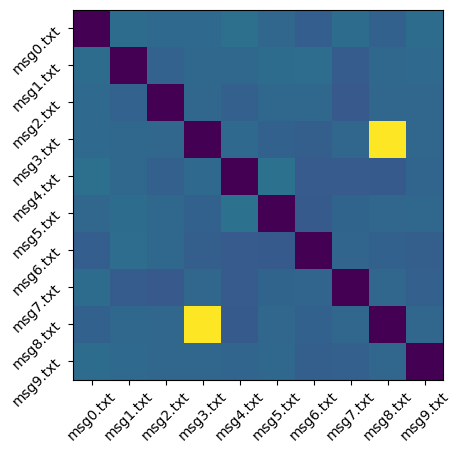

In [326]:
plt.xticks(ticks=np.arange(10),labels=messages.keys(),rotation=45)
plt.yticks(ticks=np.arange(10),labels=messages.keys(),rotation=45)

plt.imshow(zero_counts)
plt.show()